In [1]:
import numpy as np
import maze as mz 
import pandas as pd

# Problem 1: The Maze and the Random Minotaur

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [3, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])


In [4]:
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze and start of minotaur
# 3 = minotour position 
# 5 = if minotour and exit are in the same place

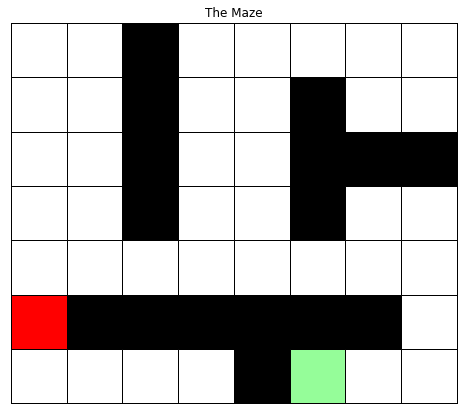

In [3]:
mz.draw_maze(maze)

In [4]:
env = mz.Maze(maze)
#env.show()
print(env.minotaur)


(5, 0)


In [19]:
T  = 20
V, policy = mz.dynamic_programming(env, T)
pol = policy[0,:]
env.update()
print(env.minotaur)
mz.draw_maze(env.maze)

KeyError: (2, 2)

## Simulation

In [14]:
path = env.simulate((1,1),policy,'DynProg')


[(1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 7),
 (6, 7),
 (6, 6),
 (6, 5),
 (6, 5),
 (6, 5),
 (6, 5),
 (6, 5),
 (6, 5),
 (6, 5),
 (6, 5)]

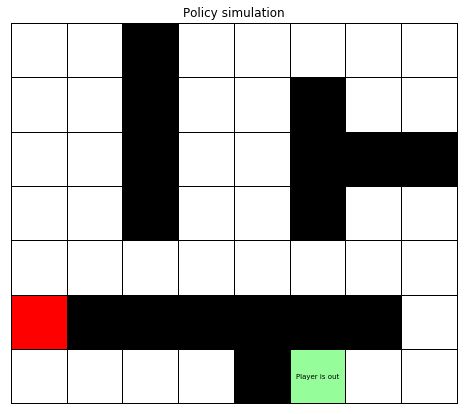

In [15]:
mz.animate_solution(maze, path)